In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
# Read data into a DataFrame
df = pd.read_csv('diabetes.csv')

# Display DataFrame head
display(df.head())

# Print DataFrame dimensions
print("\nDataframe dimensions:")
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print(df.info())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataframe dimensions:
Number of rows:  768
Number of columns:  9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [233]:
# We look at the descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [234]:
# Check data for missing values
print("Number of instances with missing values:")
print(df.isnull().sum())

Number of instances with missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


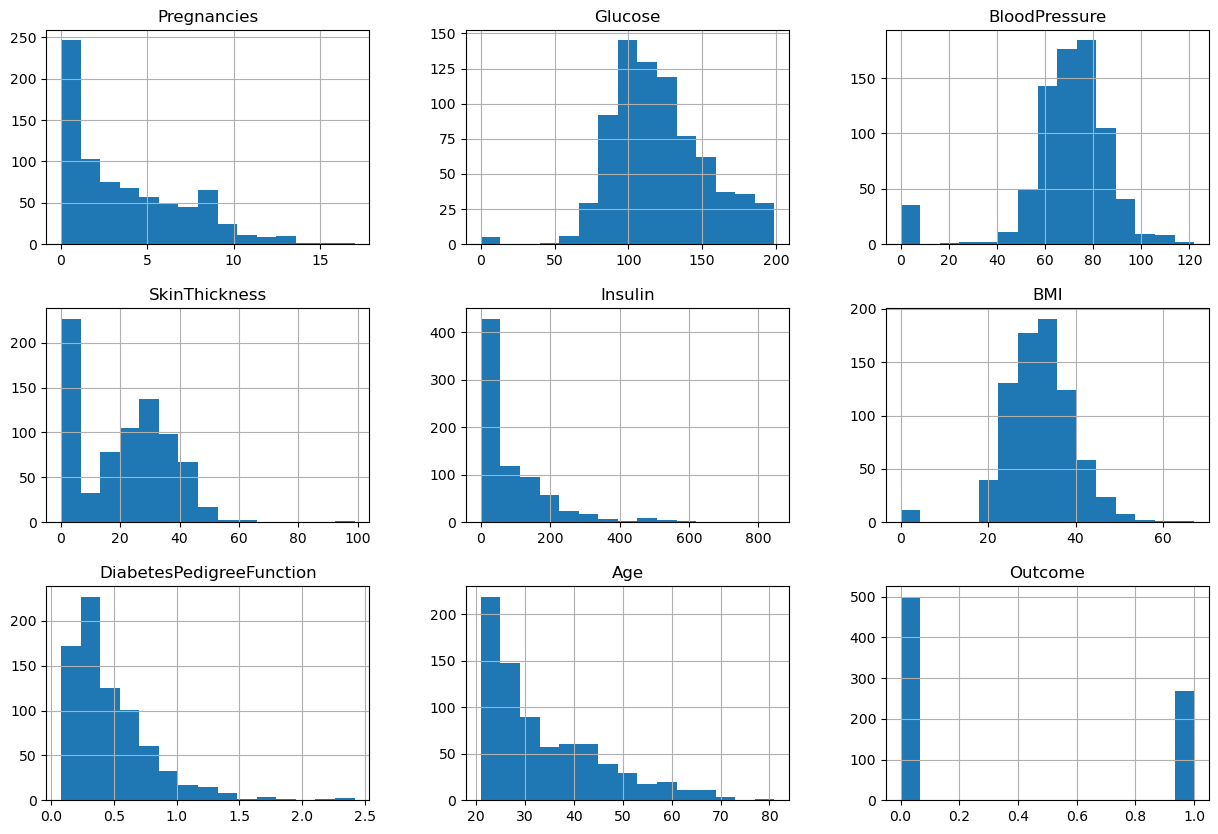

In [235]:
# Plot the distribution of the numerical values of the dataset
df.hist(bins=15, figsize=(15,10))
plt.show()

In [236]:
# Further investigate the variables with 0.0 values
zeroVal_columns = [col for col in df.columns if (df[col] == 0).any()]
print("Variables in the dataset with 0.0 values: \n")
print(zeroVal_columns)

Variables in the dataset with 0.0 values: 

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']


In [237]:
# FUNCTIONS

# Function to replace 0.0 values with the mean of the corresponding category
def replace_zero_with_mean(df,zero_columns):
    for col in zero_columns:
        df[col] = df.apply(
            lambda row: df[(df['Outcome'] == df['Outcome']) & (df[col] != 0)][col].mean()
            if row[col] == 0 else row[col], axis=1)
    return df

In [238]:
# Replace 0.0 values of variables with the mean of the corresponding category (i.e. Diabetic or Healthy Individual)
zeroVal_columns = zeroVal_columns[1:6]
print(zeroVal_columns)
df = replace_zero_with_mean(df,zeroVal_columns)

# We look at the descriptive statistics of the modified dataset
df.describe().T

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


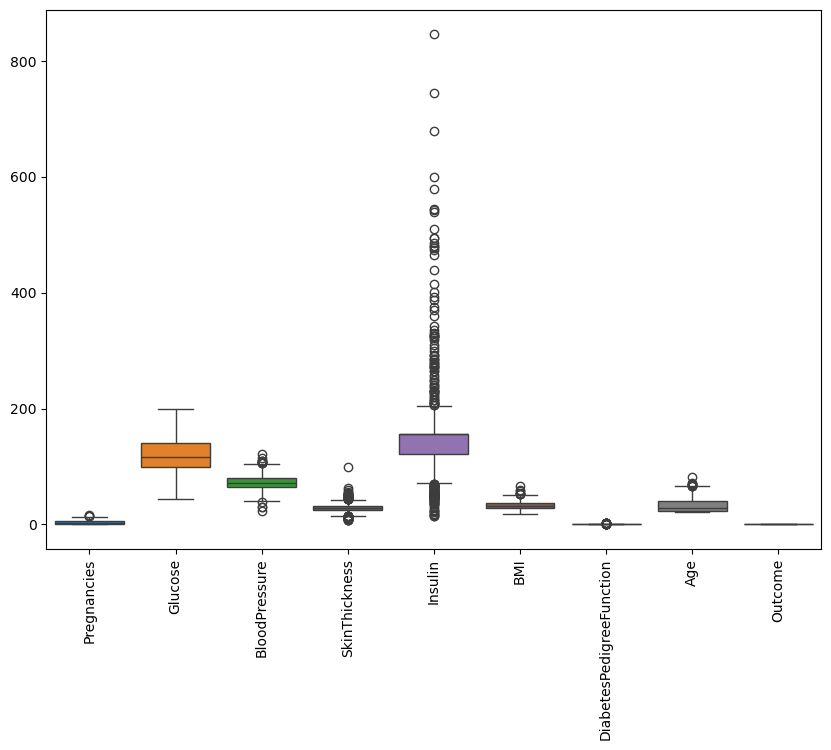

In [239]:
# Check the dataset for possible outliers
plt.figure(figsize=(10, 7))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [240]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2.288,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


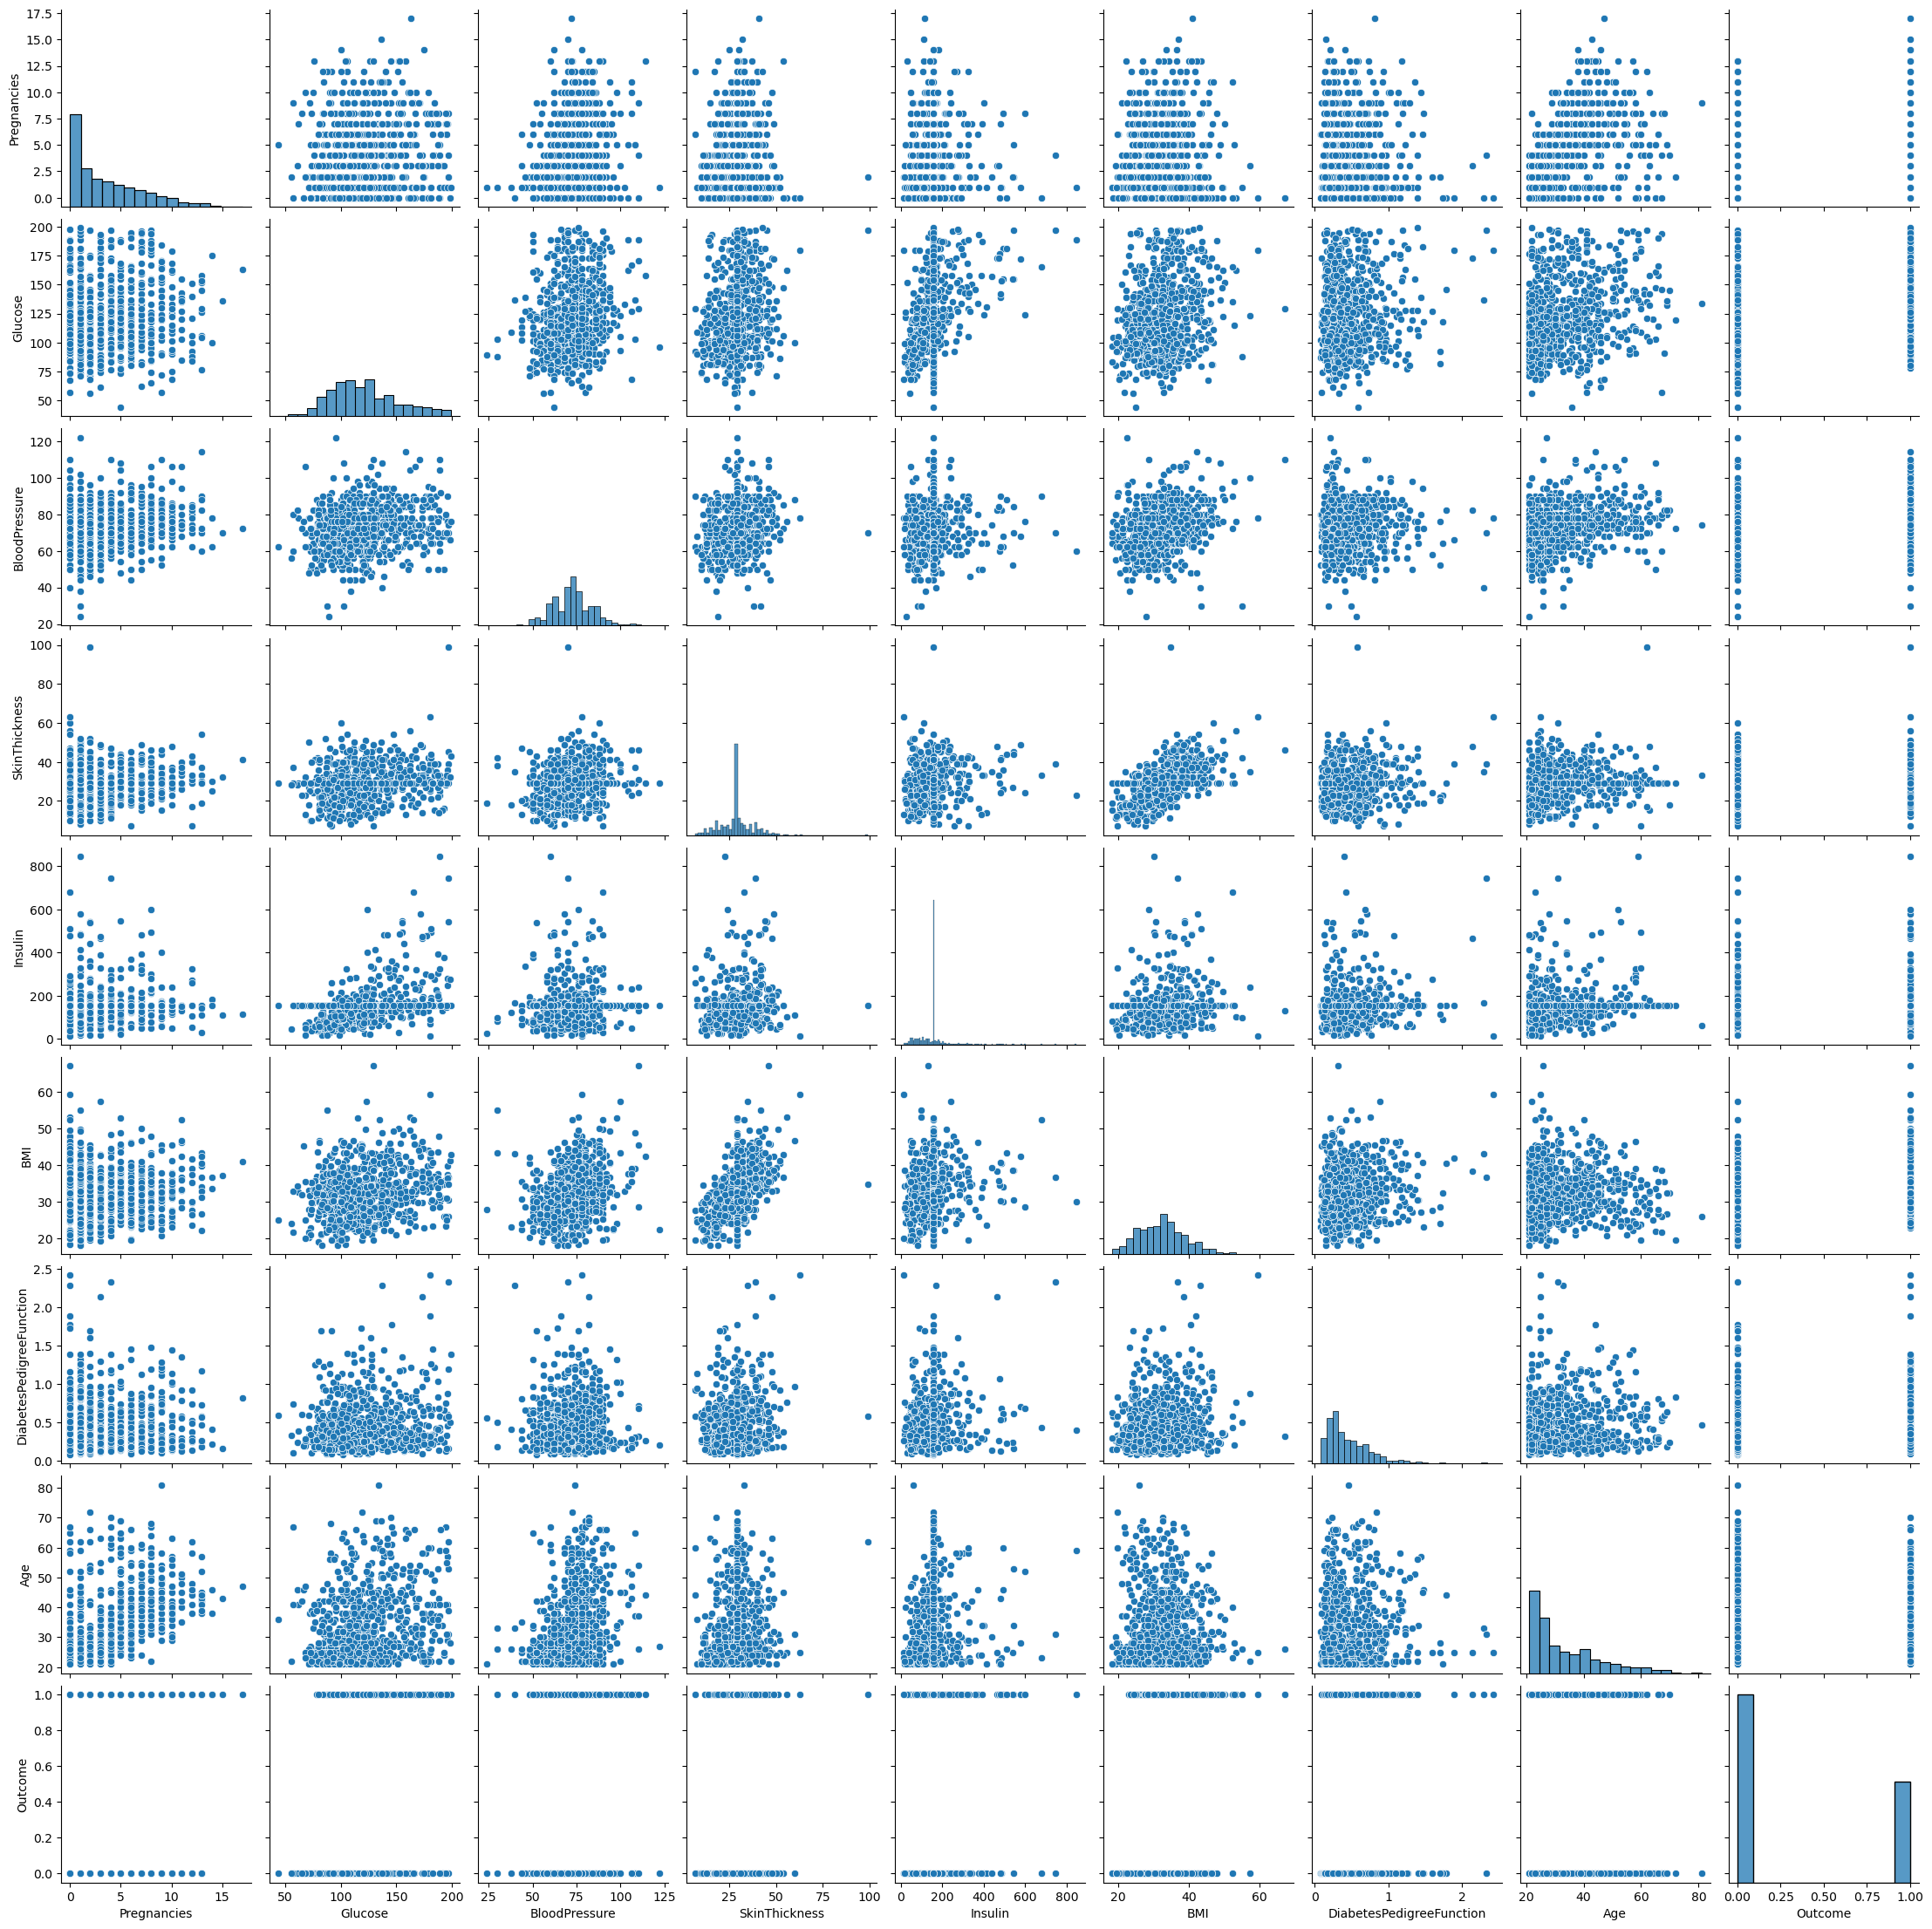

In [241]:
# Plot the relationships between all variables
sns.pairplot(df)

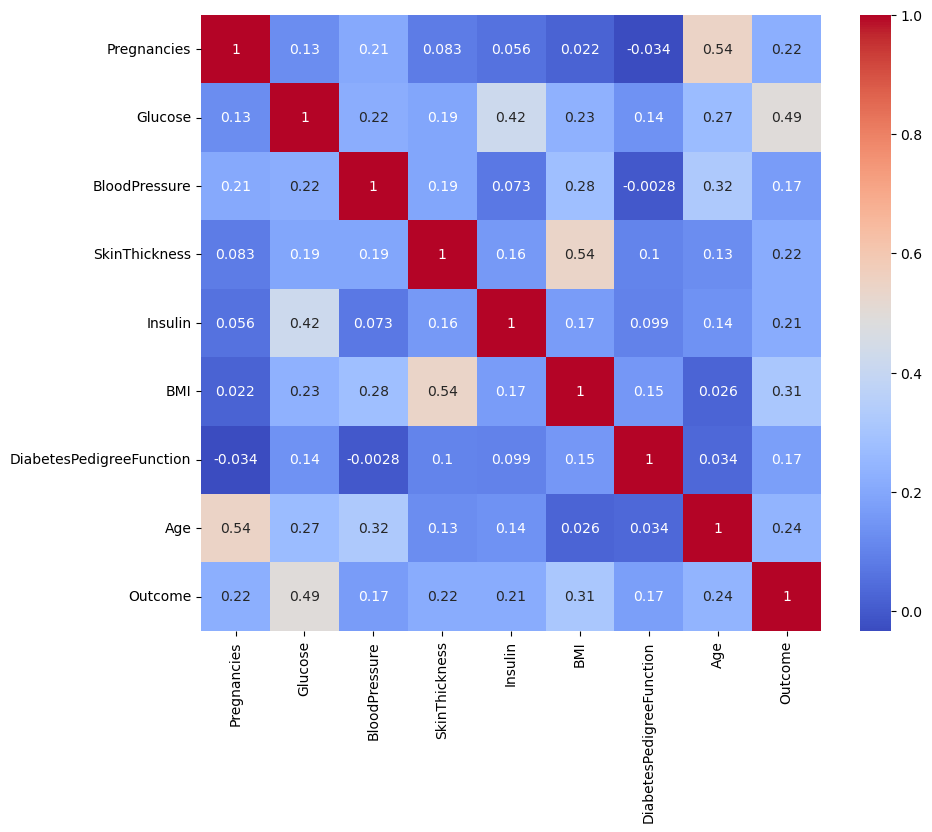

In [242]:
# Identify the relationship between the variables using correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [243]:
# Compute correlation with the outcome
correlations = df.corr()['Outcome'].drop('Outcome')
print("Correlation value of features against Outcome:")
print(correlations)

# Select features with significant correlation
threshold = 0.2
significant_features = correlations[abs(correlations) > threshold].index.tolist()
print("Significant features based on correlation:", significant_features)

Correlation value of features against Outcome:
Pregnancies                 0.221898
Glucose                     0.492928
BloodPressure               0.166074
SkinThickness               0.215299
Insulin                     0.214411
BMI                         0.311924
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64
Significant features based on correlation: ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']


In [244]:
from scipy.stats import ttest_ind

# Perform t-test for each significant feature
for feature in significant_features:
    group1 = df[df['Outcome'] == 0][feature]
    group2 = df[df['Outcome'] == 1][feature]
    
    t_stat, p_value = ttest_ind(group1, group2)
    
    print(f"Feature: {feature}, T-statistic: {t_stat}, P-value: {p_value}")

Feature: Pregnancies, T-statistic: -6.298430550035151, P-value: 5.065127298053476e-10
Feature: Glucose, T-statistic: -15.67989823120835, P-value: 2.909251656846331e-48
Feature: SkinThickness, T-statistic: -6.101873082932373, P-value: 1.6635499719924653e-09
Feature: Insulin, T-statistic: -6.07548291456038, P-value: 1.9467180024272646e-09
Feature: BMI, T-statistic: -9.086387041809566, P-value: 8.595300884275682e-19
Feature: Age, T-statistic: -6.792688071649956, P-value: 2.2099754606654358e-11


In [245]:
X = df.drop(columns=["BloodPressure","DiabetesPedigreeFunction","Outcome"])
y = df["Outcome"]
X_cols = X.columns
X_index = X.index

In [246]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = X_cols, index = X_index)

In [247]:
df_columns = df.columns

# Categorize glucose levels into Normal, Prediabetes, and Diabetes (based on Fasting Blood Glucose)
def categorize_glucose(value):
    if value < 100:
        return 'Normal'
    elif 100 <= value < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['Glucose_cat'] = df['Glucose'].apply(categorize_glucose)
df_Glucose_encoded = pd.get_dummies(df, columns=['Glucose_cat']).drop(columns=df_columns).astype(int)

# Categorize insulin levels into Normal and Abnormal
def categorize_insulin(value):
    if value >= 16.0 and value <= 166.0:
        return "Normal"
    else:
        return "Abnormal" 

df['Insulin_cat'] = df['Insulin'].apply(categorize_insulin)
df_Insulin_encoded = pd.get_dummies(df, columns=['Insulin_cat']).drop(columns=df_columns)
df_Insulin_encoded = df_Insulin_encoded.drop(columns=['Glucose_cat']).astype(int)

# Categorize BMI into Underweight, Normal, Overweight, and Obesity
BMI_bins = [0, 18.5, 24.9, 29.9, float('inf')]
BMI_labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']
df['BMI_cat'] = pd.cut(df['BMI'], bins=BMI_bins, labels=BMI_labels)
df_BMI_encoded = pd.get_dummies(df, columns=['BMI_cat']).drop(columns=df_columns)
df_BMI_encoded = df_BMI_encoded.drop(columns=['Insulin_cat','Glucose_cat']).astype(int)

In [251]:
X = pd.concat([X,df_Glucose_encoded,df_Insulin_encoded,df_BMI_encoded],axis=1)
X.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Glucose_cat_Diabetes,Glucose_cat_Normal,Glucose_cat_Prediabetes,Insulin_cat_Abnormal,Insulin_cat_Normal,BMI_cat_Underweight,BMI_cat_Normal,BMI_cat_Overweight,BMI_cat_Obesity
0,0.6,0.765432,0.835226,0.000000,0.131868,1.235294,1,0,0,0,1,0,0,0,1
1,-0.4,-0.790123,-0.021917,0.000000,-0.637363,0.117647,0,1,0,0,1,0,0,1,0
2,1.0,1.629630,0.000000,0.000000,-1.000000,0.176471,1,0,0,0,1,0,1,0,0
3,-0.4,-0.691358,-0.879060,-1.807678,-0.472527,-0.470588,0,1,0,0,1,0,0,1,0
4,-0.6,0.493827,0.835226,0.365710,1.175824,0.235294,1,0,0,1,0,0,0,0,1
